# SOK-1006 Mikroøkonomi
## Seminar 5
### Oppgave 1

### deloppgave a), b)

Ta eksponent transformasjon på begge sidene av likning (1):

In [48]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

In [49]:
x,N,K,p,w,r,k,Z=symbols('x N K p w r k Z', positive=True, real=True)
# bruk k for K_0

In [50]:
venstre=exp(log(x))
høyre=simplify(exp(log(Z)+0.5*log(N)+0.25*log(K)))
prodfn=Eq(venstre,høyre)
prodfn

Eq(x, K**0.25*N**0.5*Z)

Som er en Cobb-Douglas produktfunksjon. Skalautbytte bestemmes av summen av produksjonselastisitetene som her er $\frac{3}{4}<1$ og vi har en produktfunksjon med avtakende skalautbytte.

### deloppgave c)

In [51]:
# Overskuddsmaksimering på kort sikt
def profitt_ks(p,Z,N,k,r,w):
    return p*Z*N**(0.5)*k**(0.25)-w*N-r*k
profitt_ks(p,Z,N,k,r,w)

N**0.5*Z*k**0.25*p - N*w - k*r

In [52]:
# maksimer mhp N
dpi_N=diff(profitt_ks(p,Z,N,k,r,w),N)
foc=Eq(dpi_N,0)
foc

Eq(0.5*Z*k**0.25*p/N**0.5 - w, 0)

In [53]:
N_ks=solve(foc,N)[0]
# N*(p,w,r,k,Z)
N_ks

0.25*Z**2*sqrt(k)*p**2/w**2

In [54]:
# sjekk andreordensbetingelse for et maksimum
diff(dpi_N,N)

-0.25*Z*k**0.25*p/N**1.5

Som er negativt, og vi har dermed et maksimum.

### deloppgave d)

Vi deriverer `N_ks` i tur og orden med hensyn på de eksogene variablene:

In [55]:
diff(N_ks,p)

0.5*Z**2*sqrt(k)*p/w**2

In [56]:
diff(N_ks,w)

-0.5*Z**2*sqrt(k)*p**2/w**3

In [57]:
diff(N_ks,r)

0

In [58]:
diff(N_ks,k)

0.125*Z**2*p**2/(sqrt(k)*w**2)

In [59]:
diff(N_ks,Z)

0.5*Z*sqrt(k)*p**2/w**2

Oppsummert: $\frac{\partial N_{ks}}{\partial p}>0, \frac{\partial N_{ks}}{\partial w}<0, \frac{\partial N_{ks}}{\partial r}=0, \frac{\partial N_{ks}}{\partial k}>0, \frac{\partial N_{ks}}{\partial Z}>0$.

En økning i produktpris gir mer fortjeneste per enhet, og bedriften vil produsere mer ved å ansette flere timer med arbeidskraft.    
En økning i lønn reduserer fortjenesten, og bedriften vil produsere mindre, dermed mindre etterspørsel etter arbeidskraft.    
En økning i r påvikrer ingenting ettersom kapitalmengden ikke kan endres på kort sikt.    
En økning i k gir bedriften mulighet til å øke produksjonen, og bedriften øker antall timer arbeidskraft for å finne tilbake til det optimale forholdet.     
En økning i Z gjør faktorene mer produktive, og dermed økes etterspørsel etter faktoren som kan endres på kort sikt.

### deloppgave e)

In [60]:
# beregne kostnad som en funksjon av x
# 
n_k=solve(prodfn, N)[0]
n_ks=n_k.subs(K,k)
n_ks
# viser hvor mye arbeidskraft som brukes på kort sikt


x**2/(Z**2*sqrt(k))

In [61]:
kost_ks=w*n_ks+r*k
kost_ks

k*r + w*x**2/(Z**2*sqrt(k))

In [62]:
# beregne grensekostnad på kort sikt
MC_ks=diff(kost_ks,x)
MC_ks

2*w*x/(Z**2*sqrt(k))

Da har vi (den inverse) tilbudskurven på kort sikt $p=\frac{2wx}{Z^2\sqrt {k}}$. Dette er en rett linje med helning $\frac{2w}{Z^2\sqrt {k}}$. Vi må passe på at bedriften tjener minst 0 i profitt (dvs at tilbudskurven er den delen av grensekostnad som ligger over gjennomsnittskostnad.

In [63]:
# MC>AC
pos_profitt=simplify(MC_ks-kost_ks/x)
pos_profitt

-k*r/x + w*x/(Z**2*sqrt(k))

In [64]:
pos_prof_x=solve(pos_profitt,x)[0]
pos_prof_x

Z*k**(3/4)*sqrt(r)/sqrt(w)

Vi kan tegne et eksempel.

In [65]:
tilbud_ks=lambdify((w,x,Z,k), (2*w*x)/(Z**2*k**(0.5)))
display(tilbud_ks(w,x,Z,k))

2*w*x/(Z**2*k**0.5)

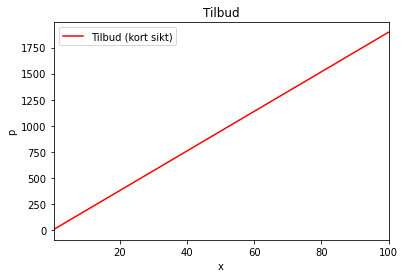

In [66]:


# eksempel med w=3, Z=1, k=0.1,r=5

x_num=np.linspace(0.01,100,100)

fig,ax=plt.subplots()
 
ax.set_ylabel('p')
ax.set_xlabel('x')
ax.plot(x_num,tilbud_ks(3,x_num,1,0.1),label='Tilbud (kort sikt)', color='red')
ax.vlines

# lavest x for positiv profitt: 0.23             
    
#ax.set_ylim([70, 90])
ax.set_xlim([(.1**(.75)*5**.5)/3**.5,100])

ax.legend(loc='upper left')
ax.set_title('Tilbud')

plt.show()

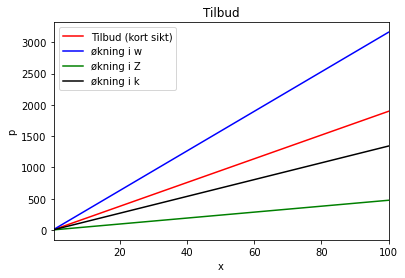

In [67]:
# se på endringer i de eksogene variablene (husk at min x endres for pos profiitt, men det tar vi ikke hensyn til her....)
# øk w
ax.plot(x_num,tilbud_ks(5,x_num,1,0.1),label='økning i w', color='blue')

# øk Z
ax.plot(x_num,tilbud_ks(3,x_num,2,0.1),label='økning i Z', color='green')

#øk k
ax.plot(x_num,tilbud_ks(3,x_num,1,.2),label='økning i k', color='black')
ax.legend(loc='upper left')
fig

### deloppgave f)

In [68]:
# Overskuddsmaksimering på lang sikt
# nå velges N og K for å maksimere overskuddet

def profitt_ls(p,Z,N,K,r,w):
    return p*Z*N**(0.5)*K**(0.25)-w*N-r*K
profitt_ks(p,Z,N,K,r,w)

K**0.25*N**0.5*Z*p - K*r - N*w

In [69]:
# Maksimer mhp N og K

dpi_NLS=diff(profitt_ls(p,Z,N,K,r,w),N)
foc_N=Eq(dpi_NLS,0)

dpi_KLS=diff(profitt_ls(p,Z,N,K,r,w),K)
foc_K=Eq(dpi_KLS,0)
display(foc_N)
display(foc_K)

Eq(0.5*K**0.25*Z*p/N**0.5 - w, 0)

Eq(0.25*N**0.5*Z*p/K**0.75 - r, 0)

In [70]:
display (dpi_NLS.args)
display (dpi_KLS.args)

(-w, 0.5*K**0.25*Z*p/N**0.5)

(-r, 0.25*N**0.5*Z*p/K**0.75)

In [71]:
display(dpi_NLS.args[0]/dpi_KLS.args[0])
display(dpi_NLS.args[1]/dpi_KLS.args[1])

w/r

2.0*K**1.0/N**1.0

In [72]:
display(Eq(2*K/N, w/r))

Eq(2*K/N, w/r)

Dette gir oss en enkel formel for K i en optimal løsning på lang sikt: $K=\frac{N}{2}\frac{w}{r}$. De to elementene her har en naturlig forklaring: $\frac{N}{2}$ kommer fra den teknologiske siden av problemstillingen, og indikerer at vi bruker halvparten så mye kapital som arbeidskraft ettersom arbeidskraft har dobbel så stor produskjonselastisitet; $\frac{w}{r}$ tar hensyn til den økoniomiske siden. Vi bruker mer av den relative billige produksjonsfaktoren.

In [73]:
K_sol=(N/2)*(w/r)
K_sol

N*w/(2*r)

Sett inn for K i én av de førsteordens betingelsene, og løs for N.

In [74]:
N_LS=solve(dpi_NLS.subs(K,K_sol),N)[0]
N_LS

0.0312499999999999*Z**4*p**4/(r*w**3)

In [75]:
K_LS=K_sol.subs(N,N_LS)
K_LS

0.015625*Z**4*p**4/(r**2*w**2)

På lang sikt må vi bruke $N=\frac{0.03125Z^4p^4}{rw^3}, K=\frac{0.015625Z^4p^4}{r^2w^3}$

In [76]:
tilbud_LS=prodfn.subs([(K,K_LS),(N,N_LS)])
tilbud_LS

Eq(x, 0.0624999999999999*Z**4.0*p**3.0/(r**1.0*w**2.0))

In [79]:
def T_LS(Z,p,w,r):
    return (0.0625*Z**4*p**3)/(r*w**2)
T_LS(Z,p,w,r)

0.0625*Z**4*p**3/(r*w**2)

In [78]:
# pass på at profitten er positiv
p*T_LS(Z,p,w,r)-w*N_LS-r*K_LS

0.0156250000000001*Z**4*p**4/(r*w**2)

In [ ]:
fig,ax=plt.subplots()
 
ax.set_ylabel('p')
ax.set_xlabel('x')
ax.plot(x_num,tilbud_ks(3,x_num,1,.1),label='Tilbud (kort sikt)', color='red')

ax.plot(x_num, T_LS(1,x_num,3, 5),label='Tilbud (lang sikt)', color='black')


             
    
ax.set_ylim([0, 2000])


ax.legend(loc='upper left')
ax.set_title('Tilbud')

plt.show()

Scenarioanalyse: Vi har med prosentvise endringer å gjøre så vi tenker med en gang på ....... *elastisiteter*. Legg merke til at vi kan skrive tilbudsfunksjonen på lang sikt som $x=0.0625Z^4p^3r^{-1}w^{-2}$. Da kan vi lese elastisitetene på pris (3), lønn (-2) og kapitalkostnaden (-1) rett fra formelen. En 25% reduksjon i produktpris fører til en 75% reduksjon i tilbud (veldig priselastisk vare!), en 10% økning i lønna fører til en 20% reduksjon i tilbudt kvantum, men en 10% økning i r fører til at tilbudet reduseres med 10%.